# Projet Hackathon Energy Data Hack, 05/04/2021


Equipe Innov Team :
Maurel Codo Toafode,
Sodiath Draman,
Marie-Claire Février,
Esmelle Gbaye.

Codage en Python : 
Marie-Claire Février

PARTIE : Identifier un DataCenter avec la consommation d'énergie en pas de 10 minutes

OBJECTIF : trouver le comportement en consommation d'énergie du site le plus comsommateur du ministère de l'éducation en 2014

- exploitation d'un des fichiers du ministère de l'éducation :
le RAE (Référence Acheminement d'Électricité. Identifiant d'un compteur électrique pour Enedis) 30002310878977 
du fichier Vague 2 - EDUCATION\REC30002310878977_Corrigée--cc.txt, 
CHANCELLERIE DES UNIVERSITES SERVICE GESTION EXPLOITATION CAMPUS SCIENTIFIQUE RANGUEIL, 118 route de Narbonne à Toulouse 
(adresse dans le fichier de la consommation annuelle Vague 2 - lot 1 - consommation annuelle d'électricité.xls ) 

- comparaison avec un autre fichier du ministère de l'éducation : rue du général Delaborde à Dijon
le RAE (Référence Acheminement d'Électricité. Identifiant d'un compteur électrique pour Enedis) 50059334290607
du fichier Vague 2 - EDUCATION\REC50059334290607_Corrigée--cc.txt
RECTORAT ACADEMIE DE DIJON, RUE DU GENERAL DELABORDE à Dijon
(adresse dans le fichier de la consommation annuelle Vague 2 - lot 1 - consommation annuelle d'électricité.xls )

###### OUTLINE

1. IMPORT
2. PARTIE 1 : Visualisation des données
3. PARTIE 2 : Suites temporelles avec Facebook Prophet
4. PARTIE 3 : Clustering (non réalisée faute de temps)
4. CONCLUSION

# Import

Tout d'abord, nous devons importer les bibliothèques que nous utiliserons pendant l'activité.
Pandas sera utilisé pour le chargement de la base de données, Numpy pour la gestion des arrays et 
la bibliothèque Matplotlib pour l'affichage des graphiques.

In [1]:
#pip install matplotlib numpy pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
##Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline
#import os
#import math

# PARTIE 1 : Visualisation des données

In [3]:
#lecture des fichiers de consommation électrique 10 min

In [4]:
data_consoP10 = pd.read_excel(r'E:\hackathon\données\Vague 2 - CULTURE\P10 CULTURE.xls')

In [5]:
data_consoP10.shape

(52560, 8)

In [6]:
data_consoP10.describe().T

,count,mean,std,min,25%,50%,75%,max
RD_SGE_GRD30001620504865_kW,52560.0,96.184684,29.609879,19.0,74.0,91.0,115.0,306.0
RD_SGE_GRD30000710531749_kW,52560.0,107.841876,32.588327,0.0,82.0,102.0,126.0,221.0
RD_SGE_GRD30000711551771_kW,52560.0,317.923440,169.678899,0.0,178.0,228.0,452.0,914.0
RD_SGE_GRD30000710146219_kW,52560.0,151.092333,76.630572,52.0,90.0,116.0,210.0,382.0
RD_SGE_GRD30002210328092_kW,52560.0,229.536891,186.658446,0.0,101.0,141.0,329.0,1003.0
RD_SGE_GRD50058465983280_kW,52560.0,569.814878,100.888688,0.0,499.0,556.0,629.0,1208.0
RD_SGE_GRD30002110542390_kW,52560.0,408.439992,74.848187,0.0,382.0,406.0,446.0,644.0


In [7]:
#N° RAE Referencement Acheminement Electricité à prendre dans le fichier de consommation annuelle
#chaque colonne RD_SGE_GRDXXXXXXXX_kW correspond à un Point De Livraison du ministère de la culture.

choix du fichier du site de Toulouse du ministère de l'éducation repéré par l'étude de la consommation annuelle sur le logiciel Tableau

ouverture du fichier texte et alimentation d'un dataframe

In [8]:
df_data_consoP10 = pd.read_csv(r"E:\hackathon\données\Vague 2 - EDUCATION\REC30002310878977_Corrigée--cc.txt", sep = ' ', names = ['date', 'heure', '10', '20', '30', '40', '50', '60'], skipinitialspace = True)
df_data_consoP10

,date,heure,10,20,30,40,50,60
0,01/01/2014,00:00,3576,3540,3581,3526,3535,3557
1,01/01/2014,01:00,3509,3610,3504,3523,3564,3559
2,01/01/2014,02:00,3646,3533,3564,3516,3547,3600
3,01/01/2014,03:00,3545,3588,3612,3542,3497,3576
4,01/01/2014,04:00,3494,3514,3547,3480,3583,3559
...,...,...,...,...,...,...,...,...
8755,31/12/2014,19:00,3790,3890,3905,3842,3850,3838
8756,31/12/2014,20:00,3826,3799,3866,3823,3775,3797
8757,31/12/2014,21:00,3746,3804,3804,3766,3751,3749
8758,31/12/2014,22:00,3679,3756,3698,3643,3710,3730


In [9]:
#La consommation est notée en kWh pour chaque pas de 10 minutes de chaque heure de chaque jour de l'année 2014.

In [10]:
df_data_consoP10.describe()

,10,20,30,40,50,60
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4531.792808,4530.515297,4532.657420,4531.316553,4532.364954,4530.954909
std,1095.316366,1097.859266,1103.056141,1106.823759,1105.019883,1097.130527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3691.000000,3690.500000,3694.000000,3691.000000,3689.000000,3698.000000
50%,4258.000000,4250.000000,4248.000000,4243.000000,4253.000000,4246.000000
75%,5191.750000,5192.250000,5179.750000,5182.000000,5189.000000,5189.500000
max,7750.000000,7826.000000,7822.000000,7831.000000,7747.000000,7685.000000


In [11]:
df_data_consoP10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    8760 non-null   object
 1   heure   8760 non-null   object
 2   10      8760 non-null   int64 
 3   20      8760 non-null   int64 
 4   30      8760 non-null   int64 
 5   40      8760 non-null   int64 
 6   50      8760 non-null   int64 
 7   60      8760 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 547.6+ KB


In [12]:
print(str(df_data_consoP10['date']))

0       01/01/2014
1       01/01/2014
2       01/01/2014
3       01/01/2014
4       01/01/2014
           ...    
8755    31/12/2014
8756    31/12/2014
8757    31/12/2014
8758    31/12/2014
8759    31/12/2014
Name: date, Length: 8760, dtype: object


In [13]:
df_data_consoP10[['date', 'heure','10']].head(134)

,date,heure,10
0,01/01/2014,00:00,3576
1,01/01/2014,01:00,3509
2,01/01/2014,02:00,3646
3,01/01/2014,03:00,3545
4,01/01/2014,04:00,3494
...,...,...,...
129,06/01/2014,09:00,6636
130,06/01/2014,10:00,6878
131,06/01/2014,11:00,6782
132,06/01/2014,12:00,6962


In [14]:
# nous constatons une consommation double le 6 janvier à la rentrée des congés de Noël, par rapport au 1er de l'an.

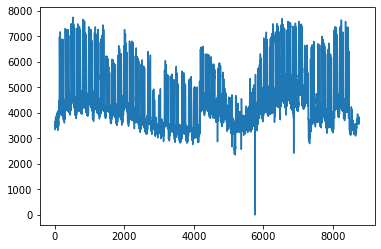

In [15]:
df_data_consoP10['10'].plot()

In [16]:
#Nous constatons une rupture de consommation d'électricité (ou une anomalie de collecte de l'information de consommation)
#Dans le fichier texte, nouv vérifions une consommation nulle du 28/09/2014 22H40 au 29/09/2014 02H20
#La visualisation sous python nous permet de déceler les anomalies au pas de 10 minutes (non décelées sous Tableau)

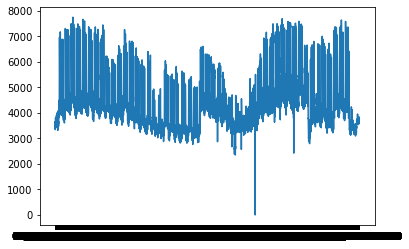

In [17]:
plt.plot(df_data_consoP10['date']+df_data_consoP10['heure'], df_data_consoP10['10'])
plt.show()
plt.close()

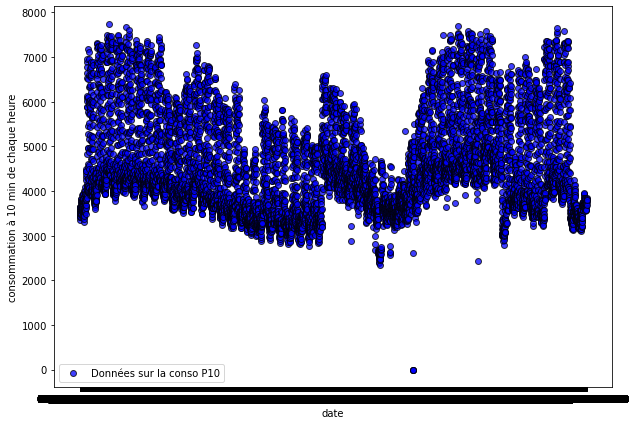

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(df_data_consoP10['date']+df_data_consoP10['heure'], df_data_consoP10['10'], color='blue', edgecolor='k', alpha=.75, label="Données sur la conso P10")
plt.xlabel('date')
plt.ylabel('consommation à 10 min de chaque heure')
plt.legend()
plt.show()

In [19]:
df_data_consoP10.shape

(8760, 8)

In [20]:
df_data_consoP10_red=df_data_consoP10.drop(['date', 'heure'], axis=1)

In [21]:
arr_data_consoP10 = df_data_consoP10_red.to_numpy()
arr_data_consoP10

array([[3576, 3540, 3581, 3526, 3535, 3557],
       [3509, 3610, 3504, 3523, 3564, 3559],
       [3646, 3533, 3564, 3516, 3547, 3600],
       ...,
       [3746, 3804, 3804, 3766, 3751, 3749],
       [3679, 3756, 3698, 3643, 3710, 3730],
       [3787, 3677, 3679, 3674, 3636, 3653]], dtype=int64)

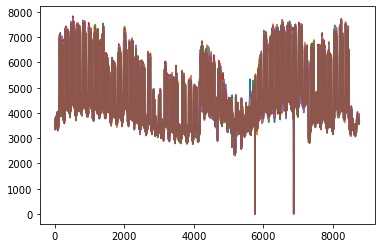

In [22]:

plt.plot(arr_data_consoP10)

In [23]:
arr_data_consoP10.shape

(8760, 6)

In [24]:
new_arr= arr_data_consoP10.reshape(52560,1)

In [25]:
new_arr.shape

(52560, 1)

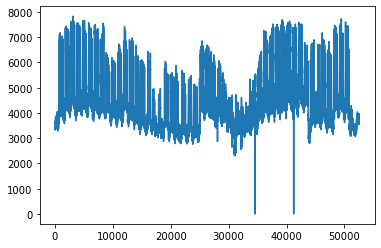

In [26]:
#affichage de la consommation d'électricité sur 2014 en pas de 10 minutes
plt.plot(new_arr)

# PARTIE 2 : Suites temporelles avec Facebook Prophet

Le modèle de Facebook Prophet est un modèle additionnant 3 éléments: la tendance, la saisonnalité et l’effet des vacances / événements, plus du bruit:
y(t) = g(t) + s(t) + h(t) + epsilon
avec g(t)== tendance, s(t)== saisonnalité, h(t)==vacances, epsilon == bruit

In [27]:
#pip install fbprophet

In [28]:
# pip install matplotlib numpy pandas seaborn scikit-learn ipython

In [29]:
import fbprophet

In [30]:
#facebook prophet

In [31]:
df_prophet = df_data_consoP10[['date','10']]

In [32]:
df_prophet.rename(columns={'date':'ds','10':'y'},inplace=True)

C:\Users\mcfev\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [33]:
df_prophet

,ds,y
0,01/01/2014,3576
1,01/01/2014,3509
2,01/01/2014,3646
3,01/01/2014,3545
4,01/01/2014,3494
...,...,...
8755,31/12/2014,3790
8756,31/12/2014,3826
8757,31/12/2014,3746
8758,31/12/2014,3679


In [34]:
# Une anomalie subsiste dans le code : chaque date est alimentée 24 fois pour les 24 heures de la journée. Le code est à optimiser...

In [35]:
# Initialize the Model
model = fbprophet.Prophet()

In [36]:
# mode additive par défaut
model.fit(df_prophet) ###Etape 1: Entrainement du model

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
from datetime import date

In [38]:
# Create Future Dates of 31 days
future_dates = model.make_future_dataframe(periods=31)

In [39]:
# Shape after adding 31 days
future_dates.shape

(396, 1)

In [40]:
future_dates

,ds
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
391,2015-01-27
392,2015-01-28
393,2015-01-29
394,2015-01-30


In [41]:
# Make Prediction with our Model
prediction = model.predict(future_dates)

In [42]:
prediction.tail(13)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
383,2015-01-19,3570.290929,2417.849466,4882.010559,3482.153101,3653.777434,175.173672,175.173672,175.173672,175.173672,175.173672,175.173672,0.0,0.0,0.0,3745.464600
384,2015-01-20,3552.550951,2553.626920,4941.513986,3454.852942,3643.284591,230.413648,230.413648,230.413648,230.413648,230.413648,230.413648,0.0,0.0,0.0,3782.964599
385,2015-01-21,3534.810973,2485.383587,5013.369372,3422.199854,3634.926170,160.824726,160.824726,160.824726,160.824726,160.824726,160.824726,0.0,0.0,0.0,3695.635700
386,2015-01-22,3517.070996,2375.629824,4881.546929,3398.224137,3625.910329,188.683554,188.683554,188.683554,188.683554,188.683554,188.683554,0.0,0.0,0.0,3705.754549
387,2015-01-23,3499.331018,2394.228726,4910.690231,3367.258052,3615.461015,227.163217,227.163217,227.163217,227.163217,227.163217,227.163217,0.0,0.0,0.0,3726.494235
388,2015-01-24,3481.591040,1619.171263,4155.968264,3340.088888,3604.028261,-591.311709,-591.311709,-591.311709,-591.311709,-591.311709,-591.311709,0.0,0.0,0.0,2890.279331
389,2015-01-25,3463.851063,1825.211764,4298.503793,3310.068541,3593.979417,-390.947107,-390.947107,-390.947107,-390.947107,-390.947107,-390.947107,0.0,0.0,0.0,3072.903956
390,2015-01-26,3446.111085,2336.418518,4967.019556,3282.878820,3586.835089,175.173672,175.173672,175.173672,175.173672,175.173672,175.173672,0.0,0.0,0.0,3621.284757
391,2015-01-27,3428.371108,2336.273644,4973.651645,3255.314691,3576.173594,230.413648,230.413648,230.413648,230.413648,230.413648,230.413648,0.0,0.0,0.0,3658.784756
392,2015-01-28,3410.631130,2175.955366,4889.383308,3224.267526,3566.478860,160.824726,160.824726,160.824726,160.824726,160.824726,160.824726,0.0,0.0,0.0,3571.455856


In [43]:
prediction.set_index("ds").tail()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2015-01-27,3428.371108,2336.273644,4973.651645,3255.314691,3576.173594,230.413648,230.413648,230.413648,230.413648,230.413648,230.413648,0.0,0.0,0.0,3658.784756
2015-01-28,3410.631130,2175.955366,4889.383308,3224.267526,3566.478860,160.824726,160.824726,160.824726,160.824726,160.824726,160.824726,0.0,0.0,0.0,3571.455856
2015-01-29,3392.891152,2371.960921,4849.027901,3194.898633,3559.767176,188.683554,188.683554,188.683554,188.683554,188.683554,188.683554,0.0,0.0,0.0,3581.574706
2015-01-30,3375.151175,2373.459777,4843.432540,3165.615501,3551.775666,227.163217,227.163217,227.163217,227.163217,227.163217,227.163217,0.0,0.0,0.0,3602.314392
2015-01-31,3357.411197,1524.829928,3947.852750,3136.544300,3539.140281,-591.311709,-591.311709,-591.311709,-591.311709,-591.311709,-591.311709,0.0,0.0,0.0,2766.099488


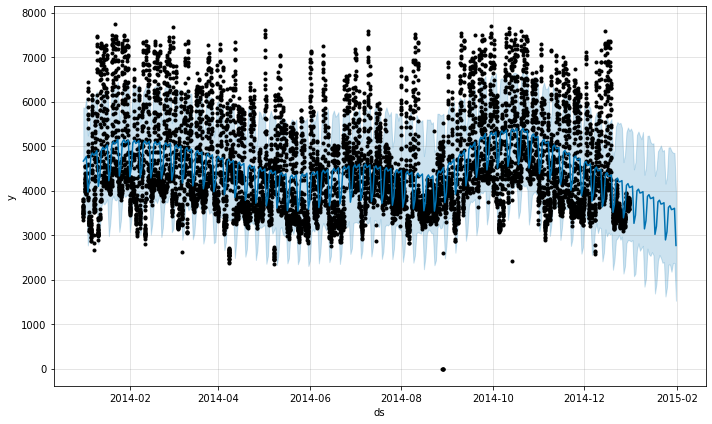

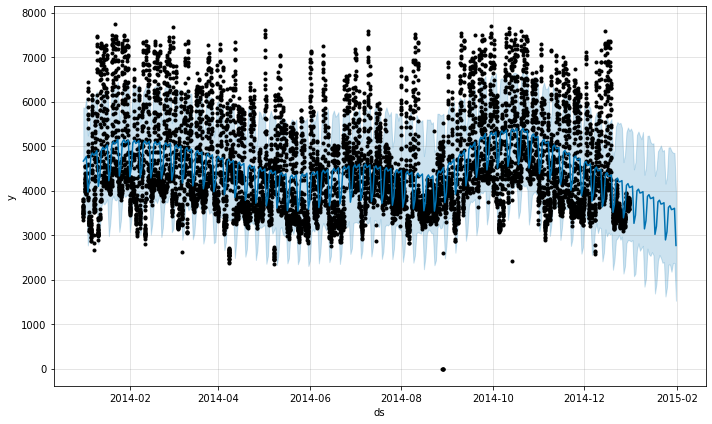

In [44]:
model.plot(prediction)

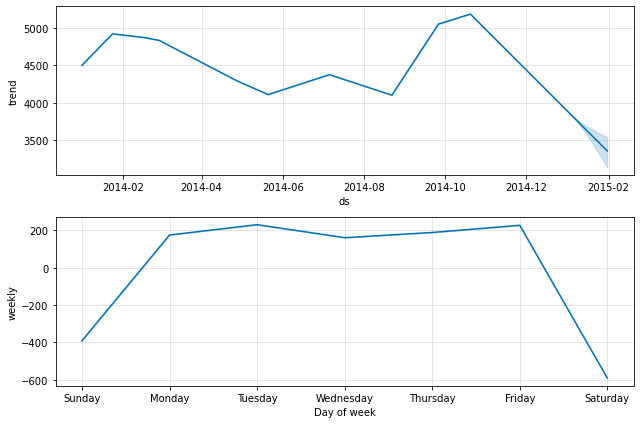

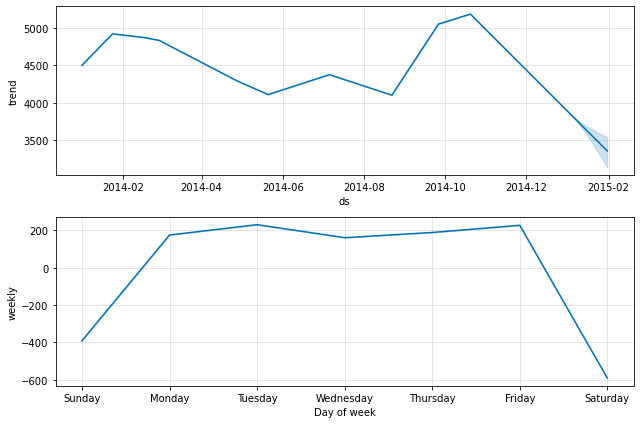

In [45]:
# Visualize Each Component [Trends,Weekly]
model.plot_components(prediction)

In [46]:
#la tendance à l'année montre une baisse lors des congés scolaires et une hausse à la rentrée, en particulier en septembre.
#La tendance à la semaine montre un pic du lundi au vendredi, une forte baisse le week-end et légère le mercredi.
#La prédiction sur le mois de janvier est biaisée, elle ne tient pas compte de la reprise de l'activité au retour de congés.
#Le Dataset devrait être  travaillé pour faire apparaître une donnée de consommation par jour (et pas 24) et surtout plusieurs
#années pour faciliter l'apprentissage de la reprise d'activité à la fin des congés scolaires et enfin il faudrait tenir compte
#de la météo.

In [47]:
#ajout des changepoints pour faire apparaître les éventuels changements d'activité humaines avec le congés scolaires

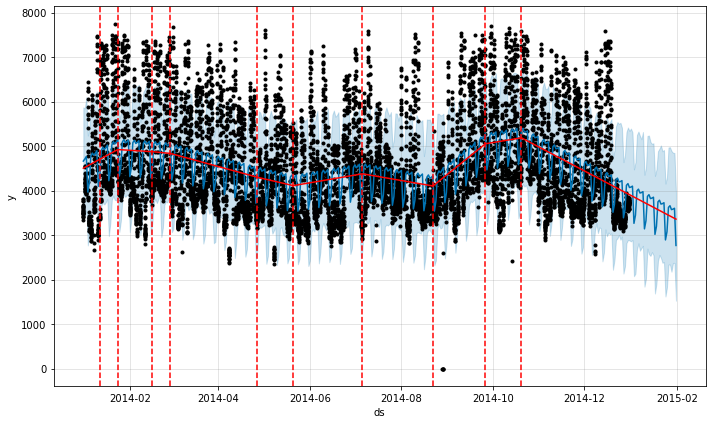

In [48]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)


In [49]:
# on voit apparaître l'alternance de l'activité humaine avec les vacances scolaires.

In [50]:
# comparaison avec la tendance de consommation en pas de 10 min d'un autre site du ministère de l'éducation en 2014

In [51]:
df_data_consoP10_Autre = pd.read_csv(r"E:\hackathon\données\Vague 2 - EDUCATION\REC50059334290607_Corrigée--cc.txt", sep = ' ', names = ['date', 'heure', '10', '20', '30', '40', '50', '60'], skipinitialspace = True)
df_data_consoP10_Autre

,date,heure,10,20,30,40,50,60
0,01/01/2014,00:00,145,146,150,155,141,144
1,01/01/2014,01:00,141,154,150,141,145,142
2,01/01/2014,02:00,150,152,147,142,147,144
3,01/01/2014,03:00,146,142,147,143,151,153
4,01/01/2014,04:00,145,142,143,144,153,148
...,...,...,...,...,...,...,...,...
8755,31/12/2014,19:00,151,151,140,138,140,149
8756,31/12/2014,20:00,144,137,137,141,146,147
8757,31/12/2014,21:00,140,140,141,151,147,139
8758,31/12/2014,22:00,139,142,152,146,141,140


In [52]:
#df_prophet_Autre = df_data_consoP10_Autre.copy()

In [53]:
df_prophet_Autre = df_data_consoP10_Autre[['date','10']]

In [54]:
df_prophet_Autre.rename(columns={'date':'ds','10':'y'},inplace=True)

C:\Users\mcfev\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [55]:
df_prophet_Autre

,ds,y
0,01/01/2014,145
1,01/01/2014,141
2,01/01/2014,150
3,01/01/2014,146
4,01/01/2014,145
...,...,...
8755,31/12/2014,151
8756,31/12/2014,144
8757,31/12/2014,140
8758,31/12/2014,139


In [56]:
# Initialize the Model
model_Autre = fbprophet.Prophet()

In [57]:
# mode additive par défaut
model_Autre.fit(df_prophet_Autre) ###Etape 1: Entrainement du model

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
# Create Future Dates of 31 days
future_dates_Autre = model_Autre.make_future_dataframe(periods=31)

In [59]:
# Shape after adding 31 days
future_dates_Autre.shape

(396, 1)

In [60]:
future_dates_Autre

,ds
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
391,2015-01-27
392,2015-01-28
393,2015-01-29
394,2015-01-30


In [61]:
# Make Prediction with our Model
prediction_Autre = model_Autre.predict(future_dates_Autre)

In [62]:
prediction_Autre.tail(13)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
383,2015-01-19,162.937311,125.979040,209.902012,162.316730,163.457586,5.085579,5.085579,5.085579,5.085579,5.085579,5.085579,0.0,0.0,0.0,168.022890
384,2015-01-20,162.759744,130.710952,210.340704,162.066768,163.320420,7.636624,7.636624,7.636624,7.636624,7.636624,7.636624,0.0,0.0,0.0,170.396368
385,2015-01-21,162.582178,126.008294,207.613152,161.808746,163.178433,3.530150,3.530150,3.530150,3.530150,3.530150,3.530150,0.0,0.0,0.0,166.112328
386,2015-01-22,162.404611,128.847774,209.761093,161.558190,163.059301,5.554091,5.554091,5.554091,5.554091,5.554091,5.554091,0.0,0.0,0.0,167.958702
387,2015-01-23,162.227045,130.931665,211.503196,161.293572,162.936635,9.144300,9.144300,9.144300,9.144300,9.144300,9.144300,0.0,0.0,0.0,171.371345
388,2015-01-24,162.049478,104.686382,188.946896,161.057558,162.812738,-16.634779,-16.634779,-16.634779,-16.634779,-16.634779,-16.634779,0.0,0.0,0.0,145.414699
389,2015-01-25,161.871912,105.961476,186.101860,160.808720,162.692658,-14.315965,-14.315965,-14.315965,-14.315965,-14.315965,-14.315965,0.0,0.0,0.0,147.555947
390,2015-01-26,161.694345,124.102924,207.466358,160.563113,162.557464,5.085579,5.085579,5.085579,5.085579,5.085579,5.085579,0.0,0.0,0.0,166.779925
391,2015-01-27,161.516779,125.786316,208.263829,160.326023,162.438375,7.636624,7.636624,7.636624,7.636624,7.636624,7.636624,0.0,0.0,0.0,169.153403
392,2015-01-28,161.339212,121.867349,205.872258,160.073564,162.328683,3.530150,3.530150,3.530150,3.530150,3.530150,3.530150,0.0,0.0,0.0,164.869363


In [63]:
prediction_Autre.set_index("ds").tail()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2015-01-27,161.516779,125.786316,208.263829,160.326023,162.438375,7.636624,7.636624,7.636624,7.636624,7.636624,7.636624,0.0,0.0,0.0,169.153403
2015-01-28,161.339212,121.867349,205.872258,160.073564,162.328683,3.530150,3.530150,3.530150,3.530150,3.530150,3.530150,0.0,0.0,0.0,164.869363
2015-01-29,161.161646,123.910151,209.494866,159.789082,162.206643,5.554091,5.554091,5.554091,5.554091,5.554091,5.554091,0.0,0.0,0.0,166.715736
2015-01-30,160.984079,129.343006,211.587236,159.517388,162.099241,9.144300,9.144300,9.144300,9.144300,9.144300,9.144300,0.0,0.0,0.0,170.128379
2015-01-31,160.806513,104.252074,182.405570,159.246012,162.001924,-16.634779,-16.634779,-16.634779,-16.634779,-16.634779,-16.634779,0.0,0.0,0.0,144.171734


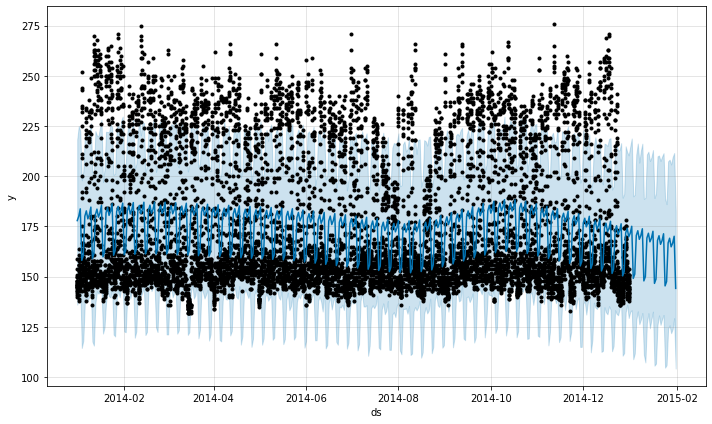

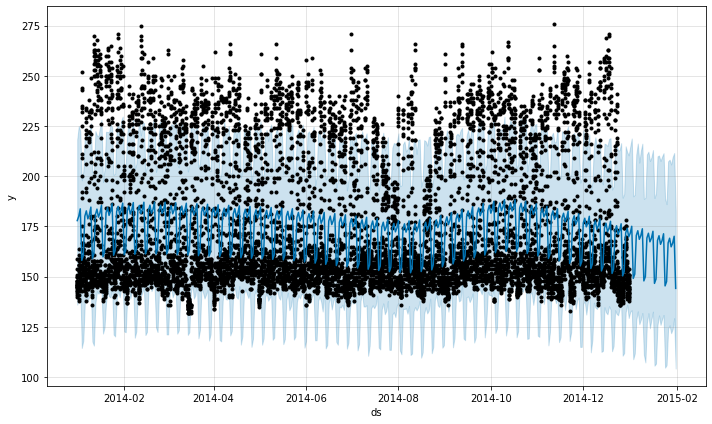

In [64]:
model_Autre.plot(prediction_Autre)

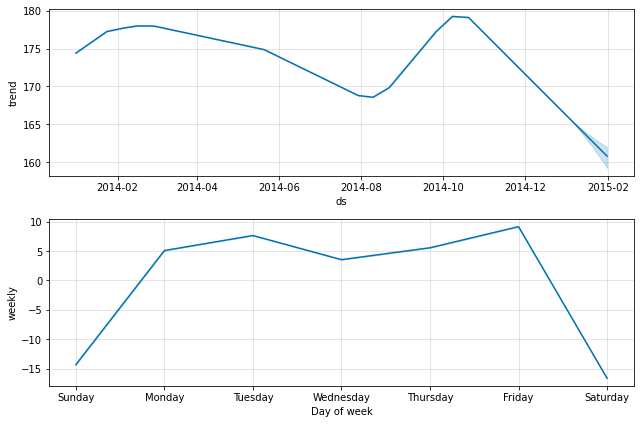

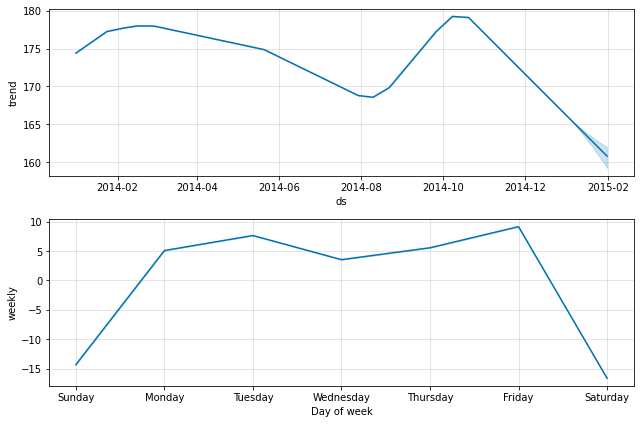

In [65]:
# Visualize Each Component [Trends,Weekly]
model_Autre.plot_components(prediction_Autre)

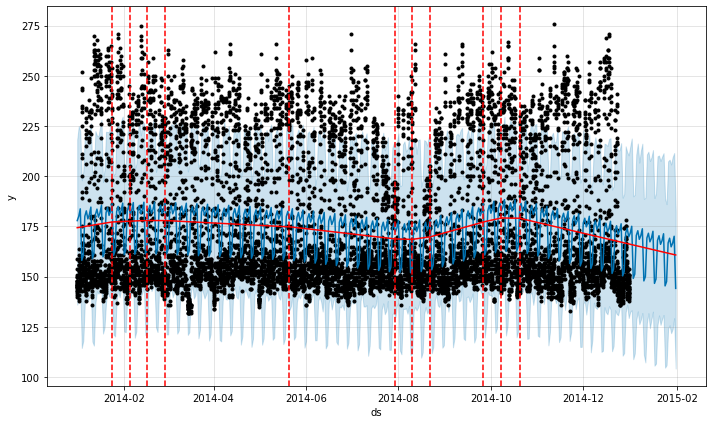

In [66]:
# ajout des changpoints
fig = model_Autre.plot(prediction_Autre)
b = add_changepoints_to_plot(fig.gca(), model_Autre, prediction_Autre)


In [67]:
#les changements au cours de l'année sont moins marqués qu'à Toulouse, sauf à la rentrée de Septembre.
#Est-ce un petit Datacenter à Dijon ? Je n'ai pas encore trouvé d'interprétation.

# PARTIE 2 : Clustering

Projet :

-caractériser une courbe 10 minutes par quelques éléments : moyenne, min, max, conso à 8H, 12H, 14H, 17H, 23H, 5H

-compiler plusieurs courbes suivant ces éléments là

-appliquer un algorithme de cluster sur cette compilation

-en sortir des clusters en choisissant le nombre de cluster arbitrairement à 4 (par ex logement, bureau, salle de classe, datacenter)

-faire varier le nombre de clusters

Faute de temps, la partie 2 n'a pas été faite en python (seulement sur le logiciel Tableau sur la consommation annuelle Vague2 lot1 du ministère de l'éducation)

In [68]:
#algo Kmeans
#https://www.datanovia.com/en/fr/blog/visualisation-du-clustering-k-means-dans-r-guide-etape-par-etape/

In [69]:
#utiliser un autre algorithme de clustering

In [70]:
#pip install kneed

In [71]:
#import matplotlib.pyplot as plt
#from kneed import KneeLocator
#from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
#from sklearn.preprocessing import StandardScaler

In [72]:
#features, true_labels = make_blobs(
#    n_samples=200,
#    centers=3,
#    cluster_std=2.75,
#    random_state=42)

In [73]:
#features[:5]

In [74]:
#true_labels[:5]

In [75]:
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)

In [76]:
#kmeans = KMeans(
#    init="random",
#    n_clusters=3,
#    n_init=10,
#    max_iter=300,
#    random_state=42)

# CONCLUSION

# Conclusion sur le résultat du projet 
Le site le plus consommateur du ministère de l'éducation en 2014 (chancellerie des universités de Rangueil à Toulouse) présente une courbe de consommation beaucoup plus haute que les autres sites du ministère de l'éducation (d'après nos résultats sur Tableau et python).
Sa consommation est presque constante mais présente quand même des saisonnalités au cours de la semaine (un creux le week end et le mercredi) et au cours de l'année : un creux l'été surtout.
Pouvons-nous en déduire que c'est un data center ? Sans doute que oui d'après sa consommation (totale ou en pas de 10 minutes)  beaucoup plus élevée que pour les autres sites. Sa saisonnalité est pourtant similaire à d'autres sites qui font apparaître l'alternance de l'activité humaine lors des congés scolaires. Ce que nous avons vérifié avec le site du rectorat de Dijon.
c'est donc presque sûr que c'est un datacenter, mais les données sont probablement fusionnées avec d'autres bâtiments.
# Conclusion sur la démarche du projet
La poursuite du projet et en particulier le clustering aurait permis de classifier les différents sites par types de courbes et saisonalité. 
La détermination d'un cluster comportant un datacenter assurément pouvait permettre d'en déduire tous les autres datacenters du même ministère ou en dehors de ce ministère.
# Conclusion sur les outils, benchmark Tableau / Python
Les librairies en Python et Tableau nous ont fournis a peu près le même type d'information, à ce stade. Le codage en python semble plus ardus.
Néanmoins, les librairies Python ouvrent plus de possibilités de personnalisation du modèle de Machine Learning (prédiction néanmoins offerte dans Tableau). La librairie Prophet de Facebook nous a permis en premier de déceler la saisonnalité de la consommation d'énergie, sans recherche particulière. Nous avons par la suite recherché cette saisonnalité sur Tableau.
Tableau permet de créer des modèles prédictifs intuitifs sans codage.
Nous n'avons pas eu le temps de tester ces modèles prédictifs ni l'import de code python dans Tableau.
Il faut plutôt voir une complétude entre Tableau et les librairies Python en ML.
# Conclusion sur l'équipe Innov Team
L'équipe pluridisciplinaire Innov Team a travaillé dans la bonne humeur et l'entente en total respect des compétences de chacun et avec bienveillance. Un projet à refaire.